In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import time
from random import sample

import sys
sys.path.append("..")

from Model.model_mosaic_spheroid import *
from Model.init_spheroid import *


from matplotlib import rcParams
params = {'legend.fontsize': '10',
         'axes.labelsize': '18',
         'axes.titlesize':'18',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

# animations in jupyter notebook
%matplotlib notebook 

import matplotlib

cmap = matplotlib.colormaps.get_cmap('Spectral')

def fun_color(v):
    u = np.array([1,0])
    return cmap(np.arccos(np.dot(u,v)/lin.norm(u)/lin.norm(v))/np.pi)

In [2]:
R = 100
L = 240

Np = 0
rp = 0
kp = 0


N = return_N(Np, rp, kp)
M = 200

#print(N)

init_positions = init_positions_N(N, R, L)
init_ecm = init_ecm_M(Np, rp, kp, M, R, L)

N1 = 90
N2 = N - N1
print('Fraction Snail cells = ', 1 - N1/N)

ind1 = sample([i for i in range(len(init_positions))],N1)
init_positions1 = np.array([init_positions[i] for i in ind1])
init_positions2 = np.array([init_positions[i] for i in range(len(init_positions)) if i not in ind1])

init_velocities1 = np.array([ran.uniform(-np.sqrt(10), np.sqrt(10),2) for i in range(N1)])
init_velocities2 = np.array([ran.uniform(-np.sqrt(10), np.sqrt(10),2) for i in range(N2)])


Fraction Snail cells =  0.3076923076923077


In [3]:
tmax = 150
dt = 1e-1
model = mosaic_model(L, tmax, dt, init_positions1, init_velocities1, init_positions2, init_velocities2, init_ecm)
model.solver(method = 'RK4')

In [9]:
sol_x1,sol_v1,sol_x2,sol_v2,sol_y = np.array(model.sol_x1), np.array(model.sol_v1), np.array(model.sol_x2), np.array(model.sol_v2), np.array(model.sol_y)
tspan = np.linspace(0,tmax,len(sol_x1))
sol_x = np.array([np.concatenate([sol_x1[i],sol_x2[i]]) for i in range(len(sol_x1))])
sol_v = np.array([np.concatenate([sol_v1[i],sol_v2[i]]) for i in range(len(sol_v1))])

<IPython.core.display.Javascript object>


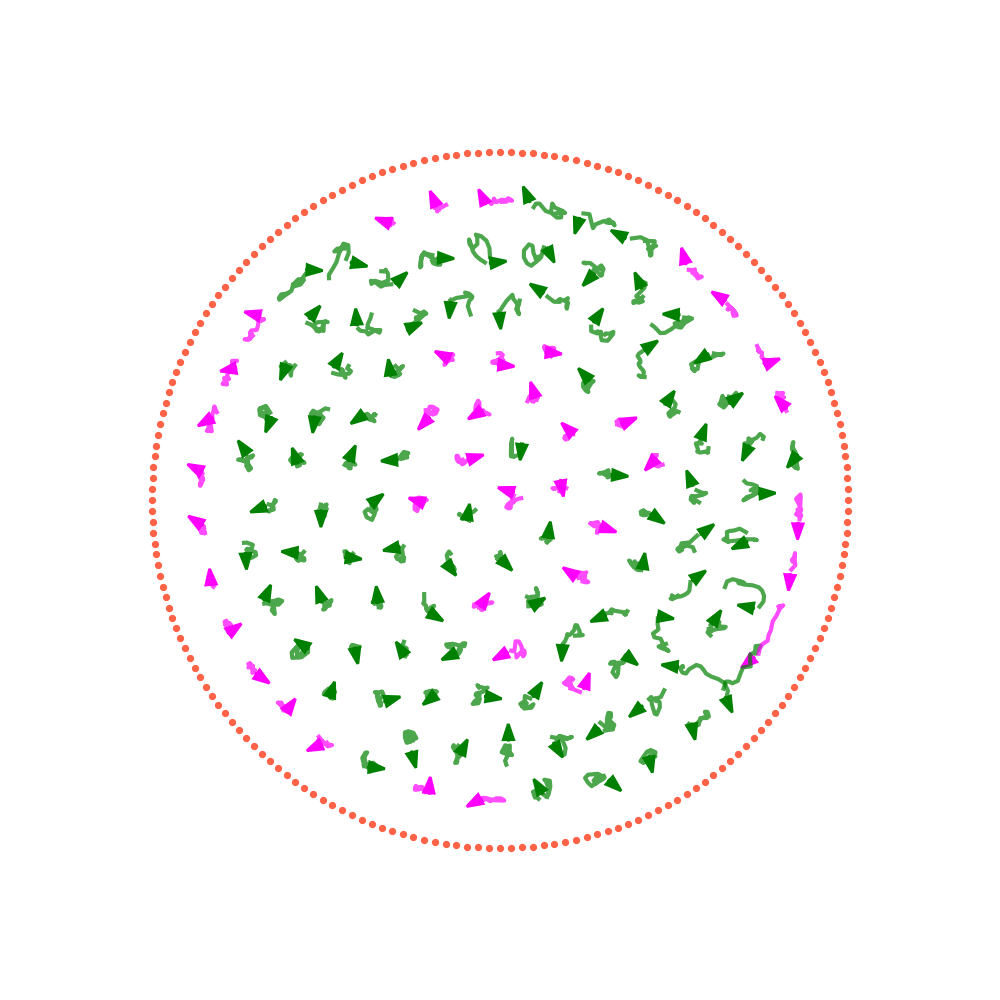

In [10]:
plt.figure(figsize = (5,5))
a = 1.35
plt.xlim(L/2 - a*R,L/2 + a*R)
plt.ylim(L/2 - a*R,L/2 + a*R)
plt.scatter(init_ecm[:,0], init_ecm[:,1], s = 2.6, color = 'tomato')
#plt.plot([200,225],[10,10], color = 'black')
#plt.text(198,15,'$25$ $\\mu$m', fontsize = 13)

plt.axis('off')
start = -15
lent = 15

for i in range(len(sol_x1[0])):
    plt.plot(sol_x1[start-lent:start,i,0],sol_x1[start-lent:start,i,1], color = 'green', alpha = .7)

for i in range(len(sol_x2[0])):
    plt.plot(sol_x2[start-lent:start,i,0],sol_x2[start-lent:start,i,1], color = 'magenta', alpha = .7)
    
i = start
for k in range(len(sol_x1[0])):
    plt.arrow(sol_x[i][k,0],sol_x1[i][k,1], sol_v1[i][k,0]/30,sol_v1[i][k,1]/30,head_width = 3, color = 'green')

for k in range(len(sol_x2[0])):
    plt.arrow(sol_x2[i][k,0],sol_x2[i][k,1], sol_v2[i][k,0]/30,sol_v2[i][k,1]/30,head_width = 3, color = 'magenta')

    
plt.tight_layout()

#plt.savefig('mosaic_snapshot.png', transparent = True, dpi = 1200)
    
plt.show()